In [1]:
# import quandl
# quandl.ApiConfig.api_key = 'sxkk5mrkwyyaEdo3RW3y' # replace with your api key

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Minimising Portfolio Volatility 

In [7]:
import os 
tickers = [each for each in os.listdir('../data') if each.endswith('.csv')]
tickers = list(map(lambda x: x[:-4], tickers))
print (tickers)

['STLD', 'PG', 'CAT', 'AMZN', 'HSY', 'NEE', 'NVDA', 'CVX', 'DIS', 'SQ', 'GOOG', 'SPOT', 'AMED', 'AAPL', 'NUE']


In [8]:
dfs = []
for ticker in tickers:
    if ticker == 'COKE' or ticker == 'SCHW':
        continue
    df = pd.read_csv('../data/'+ticker+'.csv')
    df['ticker'] = [ticker] * df.shape[0]
    df = df[['ticker','Date','Adj Close']]
    df.columns = ['ticker','date', 'adj_close']
    dfs.append(df)
    
concated_df = dfs[0]
for i in range(1, len(dfs)):
    concated_df = pd.concat([concated_df, dfs[i]])
data = concated_df[concated_df['date']>'2018-05-01']

In [9]:
data['date'] = pd.to_datetime(data['date'])

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 20 to 128
Data columns (total 3 columns):
ticker       1589 non-null object
date         1589 non-null datetime64[ns]
adj_close    1588 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 49.7+ KB


In [7]:
# tickers = ['AAPL', 'AMED', 'AMZN', 'C', 'CBAY', 
#            'COKE', 'DVN', 'GBT', 'HCA', 'HSY',
#            'INTC', 'JAG', 'JPM', 'NEE', 'NVDA',
#            'SCHW', 'TM', 'TSLA', 'WFC', 'XOM']

# tickers1 = ['AAPL', 'AMED', 'AMZN', 'C', 'CBAY', 
#            'COKE', 'DVN', 'GBT', 'HCA', 'HSY']

In [8]:
# data1 = quandl.get_table('WIKI/PRICES', ticker = tickers1, 
#                         qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
#                         date = { 'gte': '2017-12-31', 'lte': '2018-05-31' }, 
#                         paginate=True)

### for some reason cannot get GBT stock

In [9]:
# tickers2 = ['INTC', 'JAG', 'JPM', 'NEE', 'NVDA',
#            'SCHW', 'TM', 'TSLA', 'WFC', 'XOM']

In [10]:
# data2 = quandl.get_table('WIKI/PRICES', ticker = tickers2, 
#                         qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
#                         date = { 'gte': '2017-12-31', 'lte': '2018-05-31' }, 
#                         paginate=True)

In [11]:
# create a new dataframe with 'date' column as index
new = data.set_index('date')

# use pandas pivot function to sort adj_close by tickers
table = new.pivot(columns='ticker')
table.columns = [col[1] for col in table.columns]

# check the head of the output
table.head()

,AAPL,AMED,AMZN,CAT,CVX,DIS,GOOG,HSY,NEE,NUE,NVDA,PG,SPOT,SQ,STLD
date,,,,,,,,,,,,,,,
2018-05-02,175.277039,66.180000,1569.680054,142.983307,123.223785,98.825615,1024.380005,88.261642,161.280975,60.258087,226.046494,70.301971,170.000000,48.660000,44.333149
2018-05-03,175.594681,66.150002,1572.079956,142.903793,123.734406,97.972473,1023.719971,88.419350,160.896164,60.485325,232.718719,70.718193,160.380005,49.209999,44.352985
2018-05-04,182.483856,66.250000,1580.949951,145.477997,123.263069,100.343407,1048.209961,90.469658,161.912491,62.184681,238.781631,71.778564,154.259995,49.099998,45.801003
2018-05-07,183.804123,65.870003,1600.140015,148.906982,122.683723,101.662804,1054.790039,90.351379,161.182327,62.085880,248.390427,71.332619,150.000000,51.119999,46.019199
2018-05-08,184.687607,71.010002,1592.390015,149.016312,124.284286,100.978310,1053.910034,90.834381,157.787964,61.868523,250.108429,70.797470,150.639999,53.320000,46.118374


In [12]:
list(table)

['AAPL',
 'AMED',
 'AMZN',
 'CAT',
 'CVX',
 'DIS',
 'GOOG',
 'HSY',
 'NEE',
 'NUE',
 'NVDA',
 'PG',
 'SPOT',
 'SQ',
 'STLD']

#### visualise how price of each stock has evolved within give time frame

Text(0,0.5,'price in $')

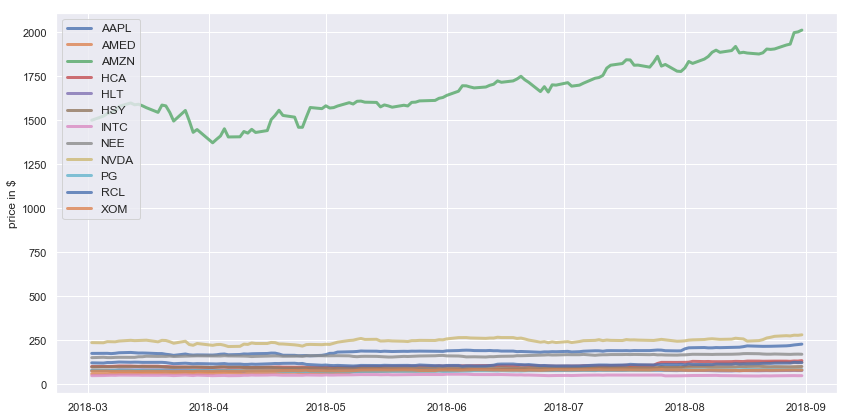

In [13]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

#### plot daily returns (instead of actual price) to see stocks' volatility

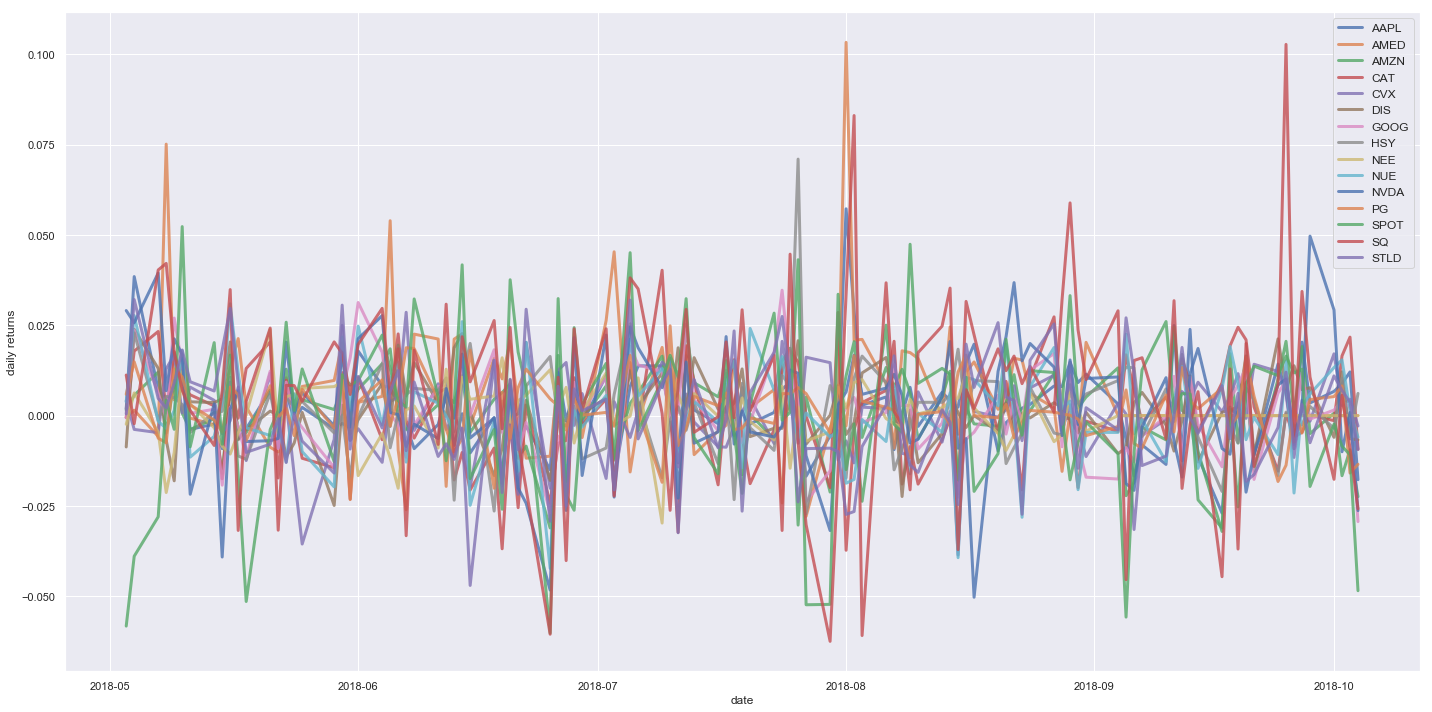

In [14]:
returns = np.log(table.pct_change() +1)
 
#fig, ax = plt.subplots( )
#ax.plot_date(time, values, marker='', linestyle='-')
plt.figure(figsize=(20, 10))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
    
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.xlabel('date')
plt.tight_layout()
plt.savefig('stocks spike')
#ax.xaxis_date()
# Make space for and rotate the x-axis tick labels
#fig.autofmt_xdate()

- coke shows greatest volitility;
- amazon shows some postivie spikes;
- Ford and JP morgan tends to be more stable

In [15]:
returns = np.log(table.pct_change() +1)
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()

#### Mean Return of stocks

In [16]:
mean_returns

AAPL    0.002507
AMED    0.006058
AMZN    0.001889
CAT     0.000966
CVX     0.000199
DIS     0.001544
GOOG    0.001290
HSY     0.001482
NEE     0.000522
NUE     0.000794
NVDA    0.002111
PG      0.001455
SPOT    0.000183
SQ      0.006526
STLD    0.000407
dtype: float64

#### covariance matrix of current portfolio

In [18]:
def cov_heatmap (cov):
    '''plot covariance matrix in heatmap style'''
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(cov, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize = (11,9))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    
    # Draw heatmap with the mask and aspect ratio
    sns.heatmap(cov, mask = mask, cmap = cmap, 
                vmax = max(np.max(cov)), vmin = min(np.min(cov)), 
                center = 0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.savefig('stocks cov')
    

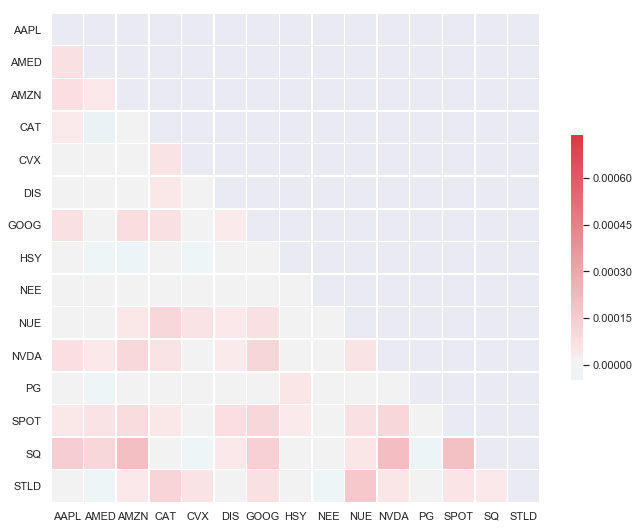

In [19]:
cov_heatmap(cov_matrix)

In [19]:
min(np.min(cov_matrix))

-2.55321281481401e-05

In [20]:
cov_matrix

,AAPL,AMED,AMZN,HCA,HLT,HSY,INTC,NEE,NVDA,PG,RCL,XOM
AAPL,0.000191,7.974072e-05,0.000106,0.000051,0.000047,0.000026,0.000132,0.000010,0.000144,0.000024,0.000046,4.029743e-05
AMED,0.000080,3.284290e-04,0.000067,0.000061,0.000035,-0.000015,0.000059,-0.000026,0.000069,-0.000018,0.000003,9.862865e-07
AMZN,0.000106,6.656326e-05,0.000256,0.000031,0.000063,-0.000008,0.000166,0.000012,0.000221,0.000009,0.000085,5.311748e-05
HCA,0.000051,6.054286e-05,0.000031,0.000188,0.000022,0.000059,0.000039,-0.000011,0.000047,0.000025,0.000058,3.665032e-05
HLT,0.000047,3.470060e-05,0.000063,0.000022,0.000143,0.000022,0.000095,-0.000008,0.000088,0.000016,0.000092,4.782752e-05
HSY,0.000026,-1.529425e-05,-0.000008,0.000059,0.000022,0.000165,0.000048,0.000025,0.000030,0.000058,0.000034,1.471196e-05
INTC,0.000132,5.923555e-05,0.000166,0.000039,0.000095,0.000048,0.000361,0.000012,0.000256,0.000033,0.000105,8.881505e-05
NEE,0.000010,-2.553213e-05,0.000012,-0.000011,-0.000008,0.000025,0.000012,0.000075,-0.000001,0.000022,-0.000012,3.056418e-06
NVDA,0.000144,6.935558e-05,0.000221,0.000047,0.000088,0.000030,0.000256,-0.000001,0.000446,0.000032,0.000101,8.094010e-05
PG,0.000024,-1.794613e-05,0.000009,0.000025,0.000016,0.000058,0.000033,0.000022,0.000032,0.000085,0.000015,2.605749e-05


#### now we try to minimize the volatility by trying different weights

In [21]:
import scipy.optimize as sco
 
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    '''
    Calculates std and return of portfolio based on:
    - weights of individual stocks  
    - mean return of individual stocks and
    - cov matrix of stocks
    '''
    # calculate returns
    returns = np.sum(mean_returns*weights ) *252
    
    # calculate volitility
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    return std, returns

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    '''
    This function solves optimisation problem to:
    minimise the portfolio volatility by 
    manipulating the weights assigned to individual stocks
    '''
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0) # weights between 0~1
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

#### feed in current portfolio

In [22]:
min_vol = min_variance(mean_returns, cov_matrix)
sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
min_vol_allocation = min_vol_allocation.T

### results

#### minimised volatility & its corresponding expected return

In [23]:
sdp_min, rp_min

(0.08528783294967833, 0.3443811095207768)

#### allocation

In [24]:
min_vol_allocation

,AAPL,AMED,AMZN,HCA,HLT,HSY,INTC,NEE,NVDA,PG,RCL,XOM
allocation,0.0,10.37,0.0,7.33,10.02,0.3,0.0,39.4,0.0,18.07,5.09,9.42


Text(0,0.5,'annualised returns')

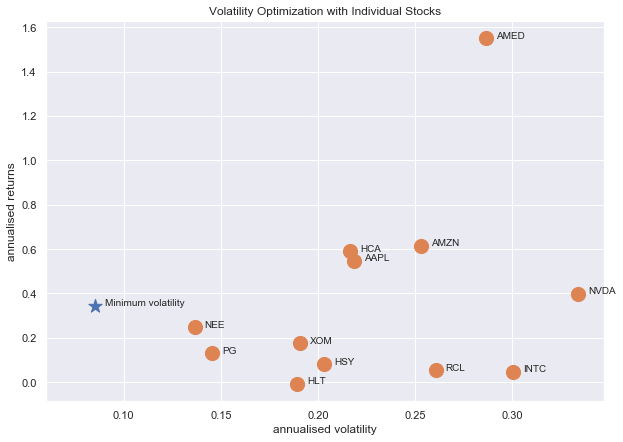

In [25]:
an_vol = np.std(returns) * np.sqrt(252)
an_rt = mean_returns * 252

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(sdp_min,rp_min,marker='*',s=200,
           label='Minimum volatility')
ax.annotate("Minimum volatility",(sdp_min,rp_min),
           xytext=(10,0),
           textcoords='offset points')
ax.scatter(an_vol,an_rt,marker='o',s=200)
for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
ax.set_title('Volatility Optimization with Individual Stocks')
ax.set_xlabel('annualised volatility')
ax.set_ylabel('annualised returns')
#ax.legend(labelspacing=0.8)

**YAY! By running portfolio optimisation, we can maintain a portfolio that has lower volatility than every single stock and attains decent return at the same time :)**

note: if we choose stocks that are more intrinsically uncorrelated, i believe we can achieve a portfolio with lower volatility

### Sharp ratio

In [26]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [36]:
num_portfolios = 500000
risk_free_rate = 0.0216

In [37]:
max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)

In [38]:
sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
max_sharpe_allocation = max_sharpe_allocation.T
max_sharpe_allocation

,AAPL,AMED,AMZN,HCA,HLT,HSY,INTC,NEE,NVDA,PG,RCL,XOM
allocation,0.0,37.93,5.4,13.18,0.0,0.0,0.0,37.84,0.0,3.95,0.0,1.7


Text(0,0.5,'annualised returns')

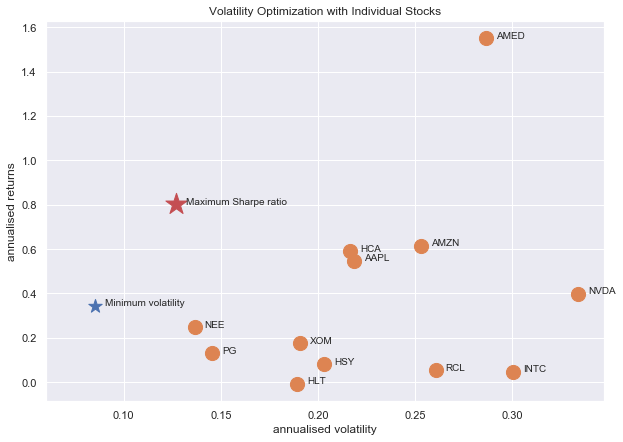

In [39]:
an_vol = np.std(returns) * np.sqrt(252)
an_rt = mean_returns * 252

fig, ax = plt.subplots(figsize=(10, 7))
# minimum volatility
ax.scatter(sdp_min,rp_min,marker='*',s=200,
           label='Minimum volatility')
ax.annotate("Minimum volatility",(sdp_min,rp_min),
           xytext=(10,0),
           textcoords='offset points')
ax.scatter(an_vol,an_rt,marker='o',s=200)

# maximum sharp ratio
ax.scatter(sdp,rp,marker='*',color='r',s=500,
           label='Maximum Sharpe ratio')
ax.annotate('Maximum Sharpe ratio',(sdp,rp),
           xytext=(10,0),
           textcoords='offset points')

for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')

ax.set_title('Volatility Optimization with Individual Stocks')
ax.set_xlabel('annualised volatility')
ax.set_ylabel('annualised returns')
#ax.legend(labelspacing=0.8)


### Efficient frontier

In [40]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [41]:
results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

Text(0,0.5,'annualised returns')

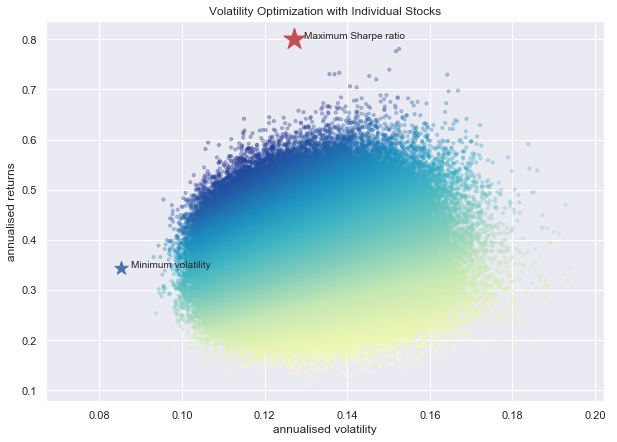

In [42]:
#results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
an_vol = np.std(returns) * np.sqrt(252)
an_rt = mean_returns * 252

fig, ax = plt.subplots(figsize=(10, 7))
# minimum volatility
ax.scatter(sdp_min,rp_min,marker='*',s=200,
           label='Minimum volatility')
ax.annotate("Minimum volatility",(sdp_min,rp_min),
           xytext=(10,0),
           textcoords='offset points')

#ax.scatter(an_vol,an_rt,marker='o',s=200)

# maximum sharp ratio
ax.scatter(sdp,rp,marker='*',color='r',s=500,
           label='Maximum Sharpe ratio')
ax.annotate('Maximum Sharpe ratio',(sdp,rp),
           xytext=(10,0),
           textcoords='offset points')

ax.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)

# for i, txt in enumerate(table.columns):
#         ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')


ax.set_title('Volatility Optimization with Individual Stocks')
ax.set_xlabel('annualised volatility')
ax.set_ylabel('annualised returns')
#ax.legend(labelspacing=0.8)

In [34]:
 def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

Text(0,0.5,'annualised returns')

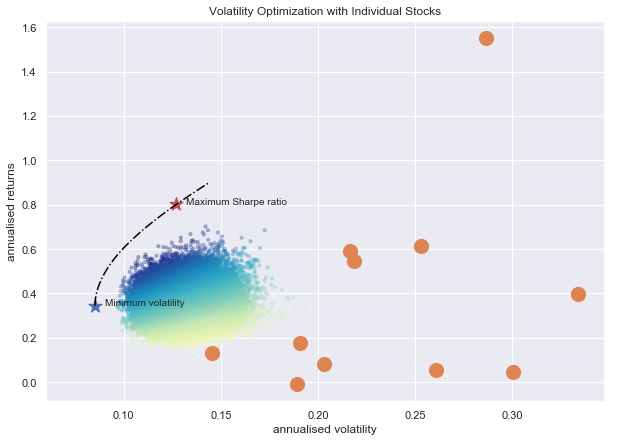

In [35]:
#results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
an_vol = np.std(returns) * np.sqrt(252)
an_rt = mean_returns * 252

fig, ax = plt.subplots(figsize=(10, 7))
# minimum volatility
ax.scatter(sdp_min,rp_min,marker='*',s=200,
           label='Minimum volatility')
ax.annotate("Minimum volatility",(sdp_min,rp_min),
           xytext=(10,0),
           textcoords='offset points')

ax.scatter(an_vol,an_rt,marker='o',s=200)

# maximum sharp ratio
ax.scatter(sdp,rp,marker='*',color='r',s=200,
           label='Maximum Sharpe ratio')
ax.annotate('Maximum Sharpe ratio',(sdp,rp),
           xytext=(10,0),
           textcoords='offset points')

ax.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)

target = np.linspace(rp_min, 0.9, 50)
efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')

# for i, txt in enumerate(table.columns):
#         ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')


ax.set_title('Volatility Optimization with Individual Stocks')
ax.set_xlabel('annualised volatility')
ax.set_ylabel('annualised returns')
#ax.legend(labelspacing=0.8)
